<a href="https://colab.research.google.com/github/jslinuxta/Colab/blob/main/notebook_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Setup and Imports
# import marimo as mo
import librosa
import librosa.display
import torchaudio
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import warnings
warnings.filterwarnings('ignore')

import IPython.display as ipd

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Week 0: Foundations of Speech & Audio Processing
Welcome to the foundational week of our Text-to-Speech course! This notebook will introduce you to the core concepts of speech and audio processing that form the backbone of modern TTS systems.

## Table of Contents

1. What is Sound?
2. Digital Audio Fundamentals
    1. Amplitude
    2. Frequency
    3. Phase
    4. Sampling Rate & Nyquist Theorem
    5. Interference
    6. Fourier Transform, FFT, STFT, Spectrogram, Mel-Spectrogram, MFCC
    7. Fundamental Frequency, Pitch, Loudness, Energy
    8. SNR, SI-SDR, Signal Qualitative Metrics
3. Excercise

## 1. What is Sound?
Sound is a vibration that propagates through a medium (like air) as waves. When we process audio digitally, we represent these continuous waves as discrete samples.

**Key Concepts:**

- **Waveform:** The shape of the sound wave over time
- **Amplitude:** The height of the wave (related to loudness)
- **Frequency:** How often the wave repeats (related to pitch)
- **Phase:** The position of the wave in its

---

### Loading and Visualizing Audio

Librosa - Sample rate: 16000, Shape: torch.Size([1, 97280])
Torchaudio - Sample rate: 16000, Shape: torch.Size([1, 97280])


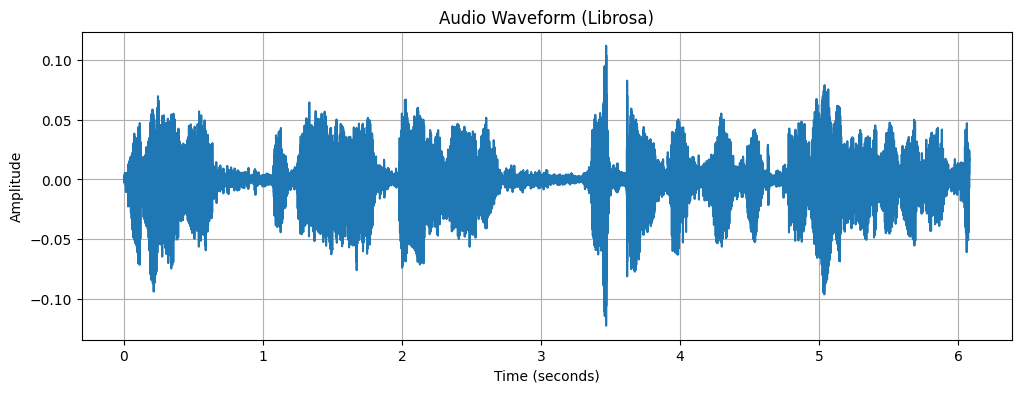

In [ ]:
audio_path = "assets/f3potrN-Qfg.hi_15.wav"  # Replace with your audio file

# Load audio file using librosa
y_librosa, sr_librosa = librosa.load(audio_path, sr=None, mono=True)
y_librosa = torch.from_numpy(y_librosa.reshape(1, -1))

# Load audio file using torchaudio
waveform_torch, sr_torch = torchaudio.load(audio_path)

# Optionaly convert waveform_torch to mono from stereo
waveform_torch = waveform_torch.mean(dim=0, keepdims=True)

print(f"Librosa - Sample rate: {sr_librosa}, Shape: {y_librosa.shape}")
print(f"Torchaudio - Sample rate: {sr_torch}, Shape: {waveform_torch.shape}")

# Plot waveform
def plot_waveform(audio, sr, title="Waveform"):
    time = np.linspace(0, audio.size(1) / sr, audio.size(1))
    plt.figure(figsize=(12, 4))
    plt.plot(time, audio.squeeze(0))
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

plot_waveform(y_librosa, sr_librosa, "Audio Waveform (Librosa)")

## 2. Digital Audio Fundamentals

### Amplitude

In signal processing, **amplitude** refers to the *magnitude* or *strength* of a signal at any point in time.

For a **speech signal**, which is a time-varying waveform, the amplitude tells you how **strong** or **loud** the signal is at each moment:
- A **higher amplitude** means a louder or stronger sound.
- A **lower amplitude** (closer to zero) means a quieter or softer sound.
- An amplitude of zero corresponds to silence.

Mathematically, if the signal is $ s(t) $ , the amplitude at time $ t $  is the value $ s(t) $ . For digital signals, this is stored as sample values (integers or floating-point numbers).

### Frequency

Imagine sound as smooth, continuous waves moving through the air — like ripples spreading across a pond.

When we want to **store** or **process** this sound on a computer, we can’t capture every tiny detail of the continuous wave. Instead, we take **regular snapshots** (or measurements) of the wave’s **amplitude** (its height or intensity) at set time intervals.

This process is called **sampling**, and the **sampling rate** (or sampling frequency) tells us how many of these snapshots we take **per second**.

*Let us visualize and listen to the same audio sample at different frequencies. Were you able to notice the difference?*

Common sampling rates:
  2000 Hz - 2.0 kHz
  4000 Hz - 4.0 kHz
  8000 Hz - 8.0 kHz
  16000 Hz - 16.0 kHz


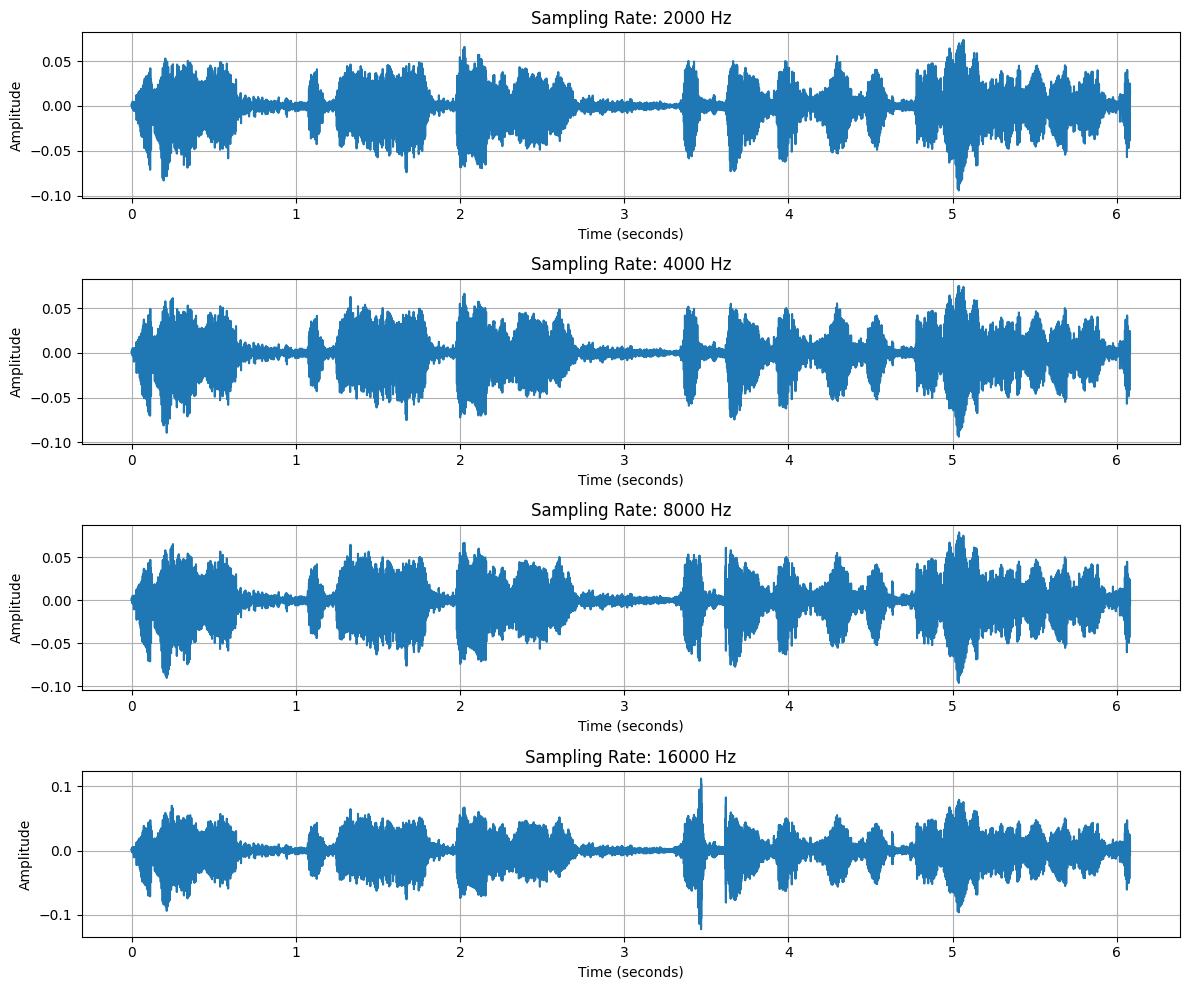

In [ ]:
# Common sampling rates in speech processing
sampling_rates = [2000, 4000, 8000, 16000]
print("Common sampling rates:")
for sr in sampling_rates:
    print(f"  {sr} Hz - {sr/1000} kHz")

# Resample audio to different rates
def demonstrate_sampling_rates(audio, original_sr, sampling_rates):
    fig, axes = plt.subplots(len(sampling_rates), 1, figsize=(12, 10))

    for i, target_sr in enumerate(sampling_rates):
        # Librosa resampling
        resampled = torchaudio.functional.resample(audio, orig_freq=original_sr, new_freq=target_sr)
        time = np.linspace(0, resampled.size(-1) / target_sr, resampled.size(-1))

        axes[i].plot(time, resampled.squeeze(0))  # Plot first 1000 samples
        axes[i].set_title(f'Sampling Rate: {target_sr} Hz')
        axes[i].set_xlabel('Time (seconds)')
        axes[i].set_ylabel('Amplitude')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

demonstrate_sampling_rates(y_librosa, sr_librosa, sampling_rates)

**What does a higher sampling rate mean?**

A higher sampling rate allows you to capture sound information at higher frequencies (up to half the sampling rate). While humans can't hear above ~20kHz, these higher frequencies contain crucial harmonic and overtone information that contributes to the overall timbre and clarity of a sound.

*Listen to some samples presented below:*

In [ ]:
target_sample_rates = [4000, 8000, 16000][::-1]

# Resample and display audio players for each target rate
for target_sr in target_sample_rates:
    # Resample the audio
    resampled_audio = torchaudio.functional.resample(y_librosa, sr_librosa, target_sr)

    # .squeeze() removes the channel dimension (e.g., (1, N) -> (N,))
    audio_data = resampled_audio.squeeze().numpy()

    # Display label and audio player
    print(f"**{target_sr/1000:.1f}KHz:**")
    display(ipd.Audio(audio_data, rate=target_sr))
    print()

**16.0KHz:**



**8.0KHz:**



**4.0KHz:**


### What is Phase?

In the context of sound waves or any periodic signal, **phase** refers to the position of a point in time on a waveform cycle.

For a simple sine wave:

$$
x(t) = A \cdot \sin(2\pi f t + \phi)
$$

where:

- $ A $: Amplitude (how tall the wave is)
- $ f $: Frequency (how many cycles per second)
- $ t $ : Time  
- $ \phi $ : **Phase offset**, in radians  

The phase $ \phi $  determines **where in the cycle** the wave starts:

- $ \phi = 0 $ : The wave starts at zero, going upward.
- $ \phi = \frac{\pi}{2} $ : The wave starts at its peak.
- $ \phi = \pi $ : The wave starts at zero, going downward.
- $ \phi = \frac{3\pi}{2} $ : The wave starts at its trough.

Phase is crucial in signal processing, especially when combining signals. Even with the same amplitude and frequency, two waves with different phases can **interfere** with each other constructively or destructively.

---

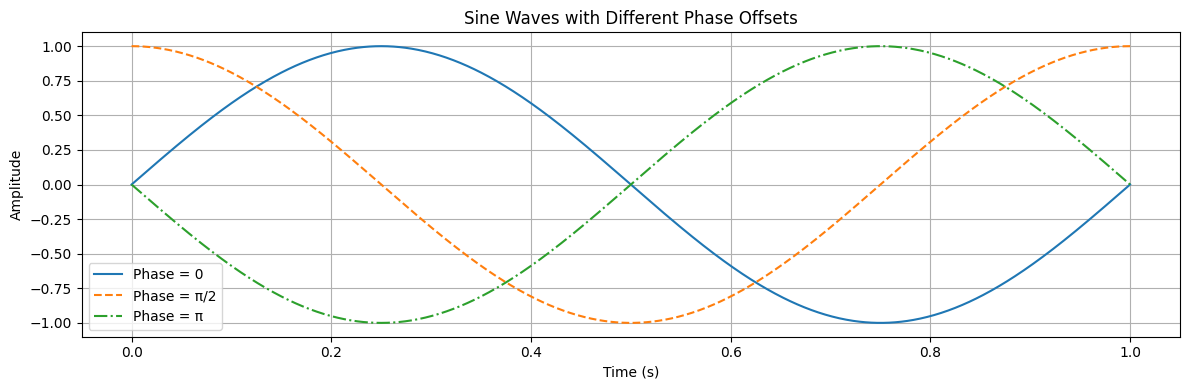

In [ ]:
# Time axis
t = np.linspace(0, 1, 1000)

# Frequency (1 Hz for simplicity)
f = 1

# Three sine waves with different phases
x1 = np.sin(2 * np.pi * f * t + 0)               # Phase = 0
x2 = np.sin(2 * np.pi * f * t + np.pi / 2)       # Phase = π/2
x3 = np.sin(2 * np.pi * f * t + np.pi)           # Phase = π

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t, x1, label='Phase = 0', linestyle='-')
plt.plot(t, x2, label='Phase = π/2', linestyle='--')
plt.plot(t, x3, label='Phase = π', linestyle='-.')
plt.title('Sine Waves with Different Phase Offsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 🌊 Constructive and Destructive Interference

In signal processing, **interference** happens when two or more waves meet and combine.

- **Constructive interference** → when waves add up, making a stronger (larger amplitude) wave.
- **Destructive interference** → when waves cancel each other out, reducing or flattening the amplitude.

This happens because of the **phase** of the waves — whether their peaks and troughs align (in-phase) or oppose (out-of-phase).

### 🛠️ Example: Adding Two Sine Waves

We’ll use:

- Two waves **in phase** (constructive)
- Two waves **out of phase** (destructive)

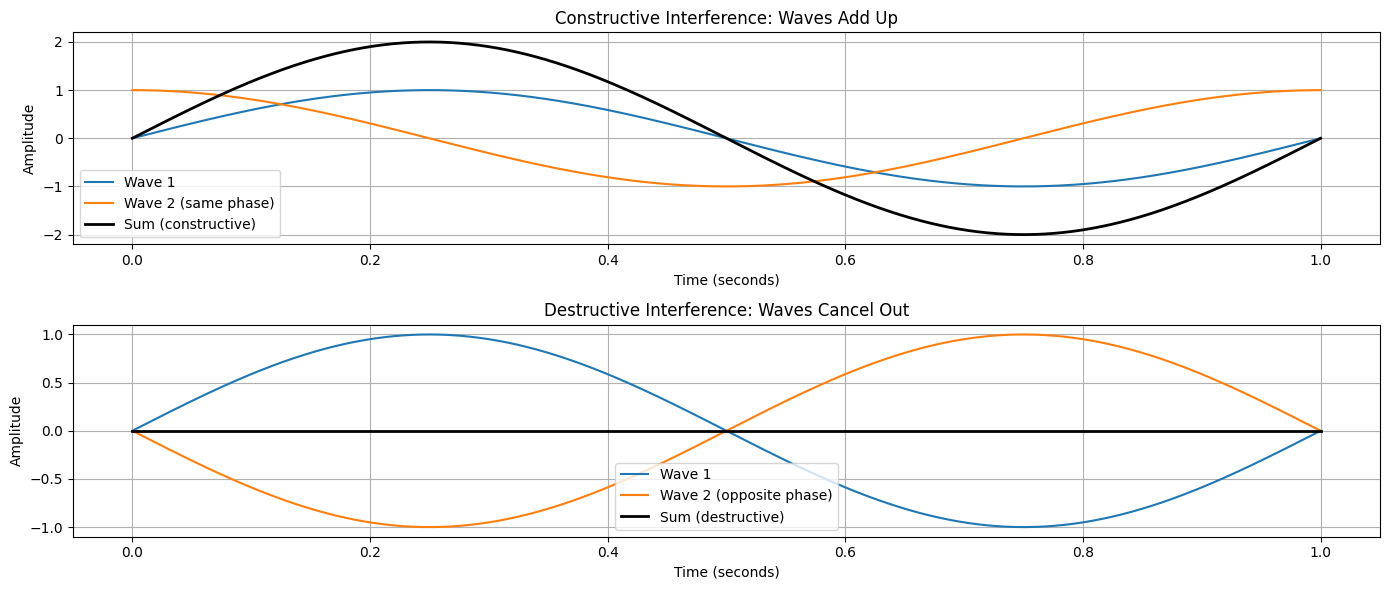

In [ ]:
# Time axis (1 second, 1000 points)
t0 = np.linspace(0, 1, 1000)

# Frequency (1 Hz for simplicity)
freq = 1

# Three sine waves with different phases
s1 = np.sin(2 * np.pi * f * t)               # Phase = 0
s2 = np.sin(2 * np.pi * f * t)               # Same phase → constructive
s3 = np.sin(2 * np.pi * f * t + np.pi)       # Opposite phase → destructive

sum_constructive = s1 + s2

sum_destructive = s1 + s3

# Plot
plt.figure(figsize=(14, 6))

# Constructive interference
plt.subplot(2, 1, 1)
plt.plot(t, x1, label='Wave 1')
plt.plot(t, x2, label='Wave 2 (same phase)')
plt.plot(t, sum_constructive, label='Sum (constructive)', linewidth=2, color='black')
plt.title('Constructive Interference: Waves Add Up')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Destructive interference
plt.subplot(2, 1, 2)
plt.plot(t, x1, label='Wave 1')
plt.plot(t, x3, label='Wave 2 (opposite phase)')
plt.plot(t, sum_destructive, label='Sum (destructive)', linewidth=2, color='black')
plt.title('Destructive Interference: Waves Cancel Out')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

---
### Nyquist-Shannon Sampling Theorem

The **Nyquist-Shannon sampling theorem** is a foundational concept in signal processing. It states that to accurately reconstruct a continuous (analog) signal from its digital samples, the signal must be sampled at a rate that is at least **twice the highest frequency component** present in the signal.

This minimum required rate is called the **Nyquist rate**, and half the sampling rate is known as the **Nyquist frequency**:

$$
f_{\text{Nyquist}} = \frac{f_s}{2}
$$

where $ f_s $  is the sampling rate in Hz.

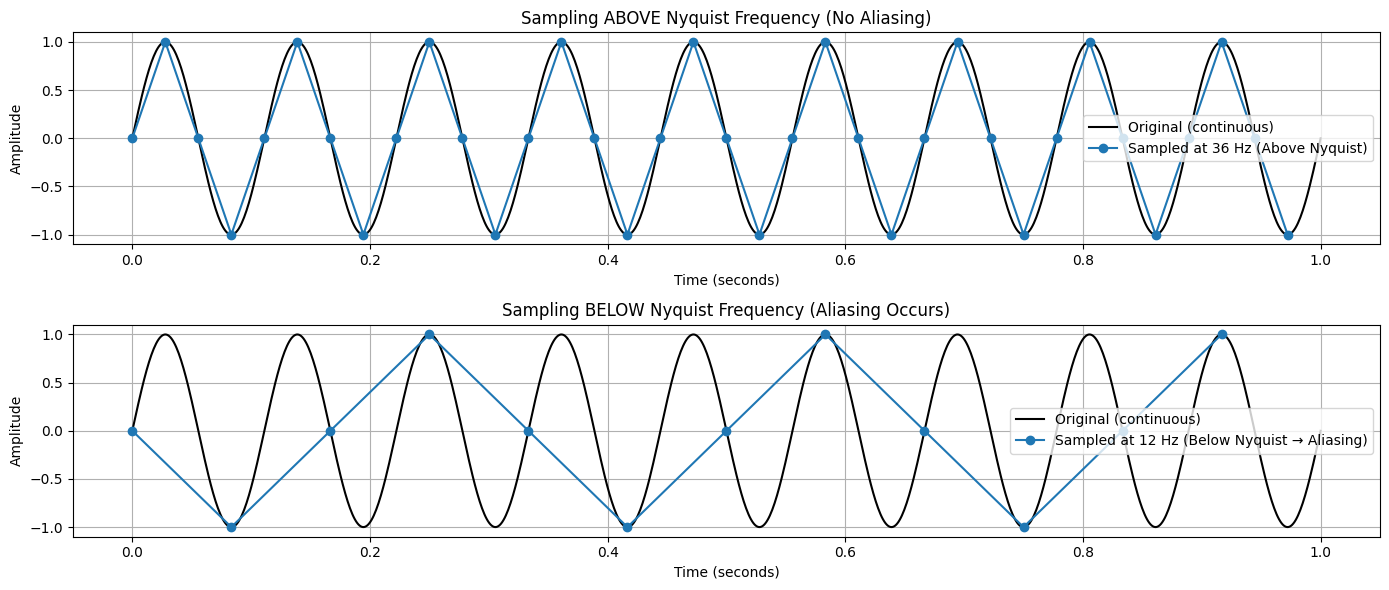

In [ ]:
# Original continuous signal (simulated with high-res time)
f_signal = 9  # Hz, signal frequency
t_continuous = np.linspace(0, 1, 1000)  # fine time grid
signal_continuous = np.sin(2 * np.pi * f_signal * t_continuous)

# Case 1: Sampled ABOVE Nyquist (sampling rate > 2 * f_signal)
fs_high = 36  # Hz, high sampling rate
t_high = np.arange(0, 1, 1/fs_high)
signal_high = np.sin(2 * np.pi * f_signal * t_high)

# Case 2: Sampled BELOW Nyquist (sampling rate < 2 * f_signal)
fs_low = 12  # Hz, low sampling rate (Nyquist would need at least 18 Hz)
t_low = np.arange(0, 1, 1/fs_low)
signal_low = np.sin(2 * np.pi * f_signal * t_low)

# Plot
plt.figure(figsize=(14, 6))

# Plot high sampling
plt.subplot(2, 1, 1)
plt.plot(t_continuous, signal_continuous, 'k-', label='Original (continuous)')
plt.plot(t_high, signal_high, 'o-', label=f'Sampled at {fs_high} Hz (Above Nyquist)')
plt.title('Sampling ABOVE Nyquist Frequency (No Aliasing)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot low sampling (aliasing)
plt.subplot(2, 1, 2)
plt.plot(t_continuous, signal_continuous, 'k-', label='Original (continuous)')
plt.plot(t_low, signal_low, 'o-', label=f'Sampled at {fs_low} Hz (Below Nyquist → Aliasing)')
plt.title('Sampling BELOW Nyquist Frequency (Aliasing Occurs)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 🌊 What is the Fourier Transform?

The **Fourier Transform** is a mathematical tool that lets us break down a time-domain signal (like an audio waveform) into its basic building blocks: **sine and cosine waves** of different frequencies.

In simple terms, it answers:
> **"What frequencies are present in this signal, and how strong are they?"**

For example, a musical chord contains several notes (frequencies) mixed together. The Fourier Transform can separate them out.

⚠ **Limitation**:
The classic Fourier Transform assumes the signal is *infinite* and *stationary* — it doesn’t tell us **when** certain frequencies appear.

---

### 🔍 Visualization Example
Let’s generate a signal with two frequencies and compute its frequency spectrum.

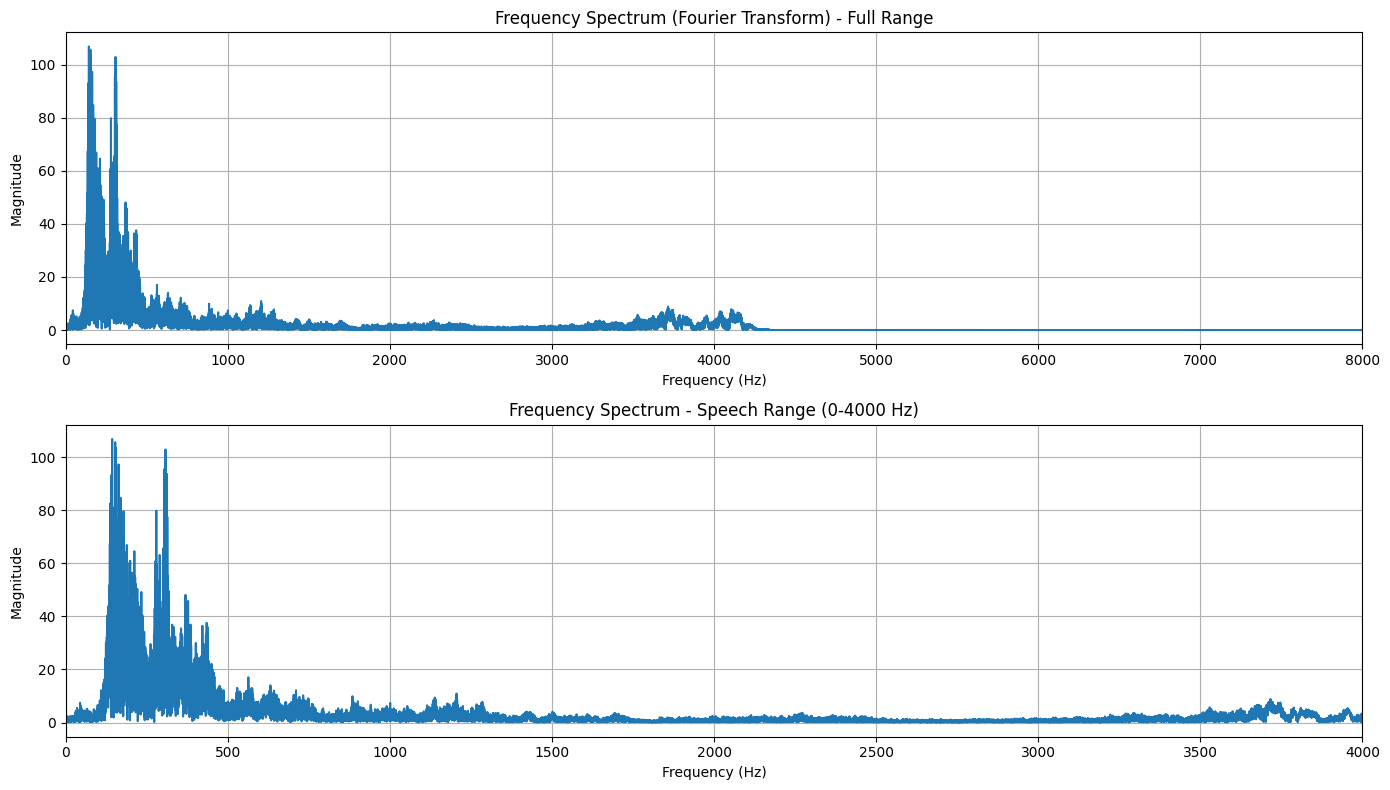

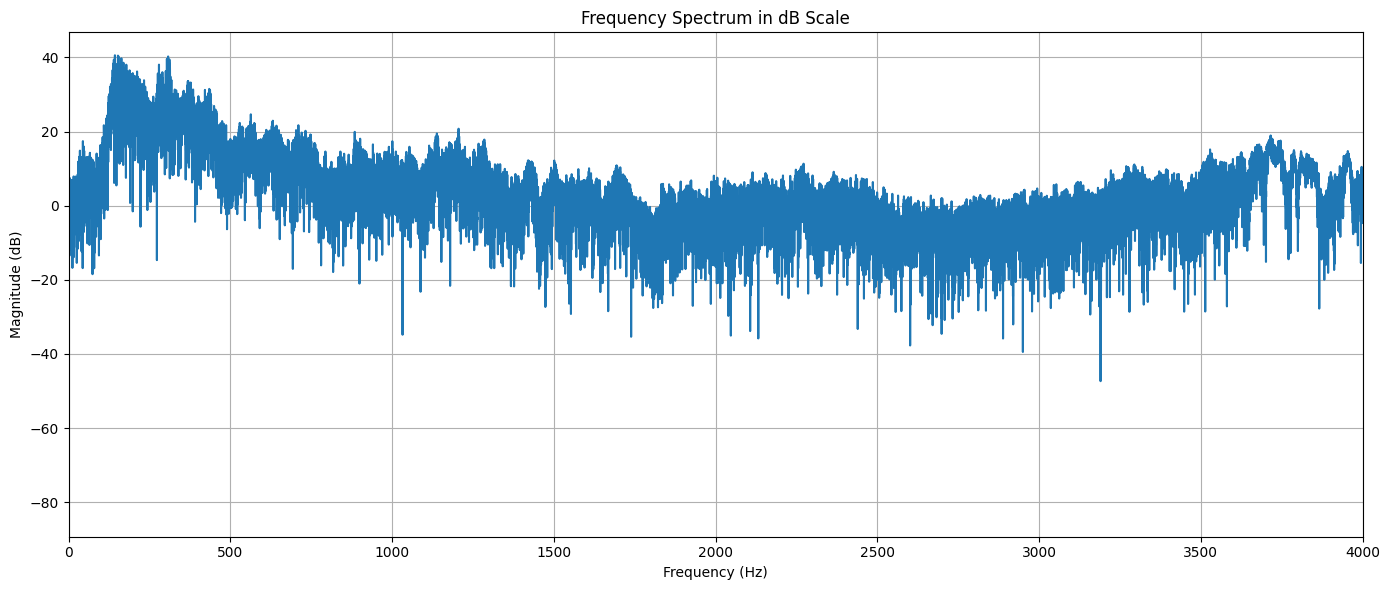

Signal length: 97280 samples
Duration: 6.08 seconds
Frequency resolution: 0.16 Hz
Nyquist frequency: 8000.0 Hz


In [ ]:
# Use the existing audio signal
fs = sr_librosa  # Sampling rate (Hz)
signal = y_librosa.reshape(-1)

# Compute FFT
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), 1/fs)

# Get magnitude spectrum
magnitude = np.abs(fft_result)

# Only plot positive frequencies (due to symmetry of real signals)
positive_freq_idx = freqs >= 0
freqs_positive = freqs[positive_freq_idx]
magnitude_positive = magnitude[positive_freq_idx]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot 1: Full frequency range
plt.subplot(2, 1, 1)
plt.plot(freqs_positive, magnitude_positive)
plt.title('Frequency Spectrum (Fourier Transform) - Full Range')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, fs/2)  # Limit to Nyquist frequency

# Plot 2: Focus on speech range (0-4000 Hz)
plt.subplot(2, 1, 2)
plt.plot(freqs_positive, magnitude_positive)
plt.title('Frequency Spectrum - Speech Range (0-4000 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 4000)  # Focus on speech frequencies

plt.tight_layout()
plt.show()

# Optional: Plot in dB scale for better visualization
plt.figure(figsize=(14, 6))

# Convert to dB (add small value to avoid log(0))
magnitude_db = 20 * np.log10(magnitude_positive + 1e-10)

plt.plot(freqs_positive, magnitude_db)
plt.title('Frequency Spectrum in dB Scale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, 4000)  # Focus on speech range
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Signal length: {len(signal)} samples")
print(f"Duration: {len(signal)/fs:.2f} seconds")
print(f"Frequency resolution: {fs/len(signal):.2f} Hz")
print(f"Nyquist frequency: {fs/2} Hz")

## ⚡ What is FFT?

The **Fast Fourier Transform (FFT)** is an **efficient algorithm** for computing the Fourier Transform.

Instead of directly applying the math (which is computationally expensive), FFT reduces the time complexity from $O(N^2)$ to $O(N \log N)$.

In practice, whenever you see “Fourier Transform” being computed on a computer or in Python, it’s usually done using **FFT**.

✅ **Key point**:
FFT gives the **overall frequency content** of the entire signal but no information about how frequencies **change over time**.

## 🎛️ What is STFT (Short-Time Fourier Transform)?

While FFT gives us the frequency content of the **whole signal**, it doesn't tell us *when* certain frequencies appear.

But speech and music are **non-stationary** — the frequencies change over time!

The **STFT** solves this by:
- Breaking the signal into **small time windows** (or frames)
- Applying the FFT to each window

This gives a **time-frequency representation**: we can see how the frequency content evolves across time.

✅ **Why STFT over FFT for speech?**
- Speech sounds change rapidly (vowels, consonants, pauses).
- We need both **time** and **frequency** information.

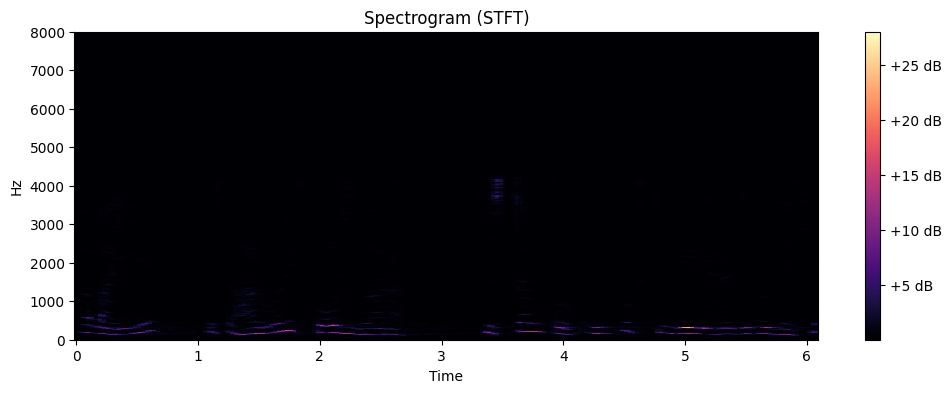

In [ ]:
D = np.abs(librosa.stft(y_librosa.squeeze().numpy()))

# Plot spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr_librosa, x_axis='time', y_axis='linear')
plt.title('Spectrogram (STFT)')
plt.colorbar(format='%+2.0f dB')
plt.show()

---
## ⚠ Why is the STFT Spectrogram Empty?

In the previous plot, the STFT spectrogram looked **mostly black** because:
- We plotted the **raw magnitude values**, but these can have a huge dynamic range (very large differences between the strongest and weakest frequencies).
- Human eyes (and ears) perceive things **logarithmically**, not linearly.
- Quiet components are invisible next to loud ones if we don't apply **log scaling** or convert to **decibels (dB)**.

✅ **Fix**: Convert the amplitude to dB scale (log scale) before plotting.

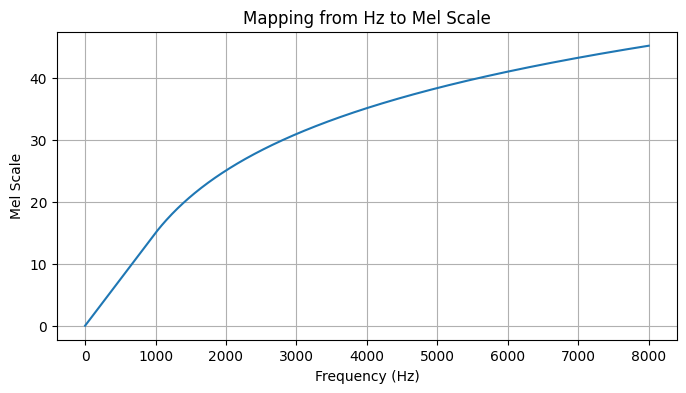

In [ ]:
hz = np.linspace(0, 8000, 500)
mel = librosa.hz_to_mel(hz)

plt.figure(figsize=(8, 4))
plt.plot(hz, mel)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Scale')
plt.title('Mapping from Hz to Mel Scale')
plt.grid(True)
plt.show()

---
## 🔥 Plotting the Mel-Spectrogram

The **Mel-spectrogram**:
- Applies a Mel filterbank on top of the STFT.
- Focuses on perceptually important frequency bands.
- Converts the power/amplitude to a log scale (usually dB).

✅ This makes the structure of the speech signal **much clearer** and easier to visualize!

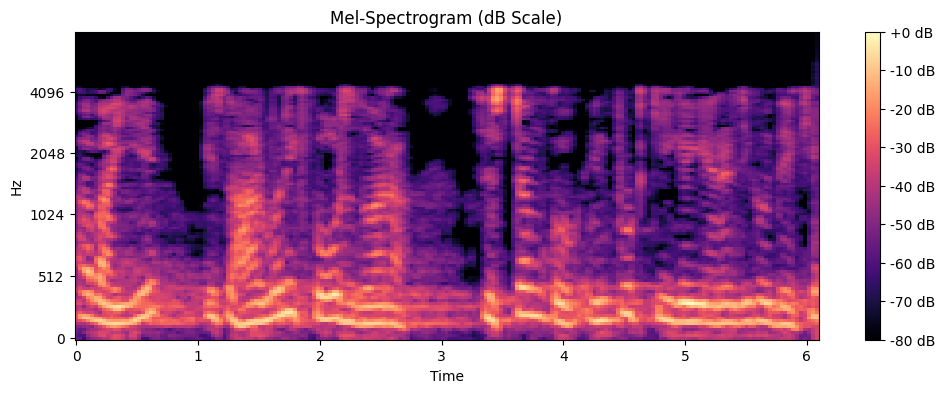

In [ ]:
# Compute Mel-spectrogram
S = librosa.feature.melspectrogram(y=y_librosa.squeeze().numpy(), sr=sr_librosa, n_mels=128)

# Convert to dB
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot
plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram (dB Scale)')
plt.show()

## 🌟 Why Does the Mel-Spectrogram Look Clear?

✅ We applied:
- **Mel scaling** → focuses on perceptual frequency bands.
- **Logarithmic scaling (dB)** → compresses dynamic range, making both loud and quiet parts visible.

This is why models like speech recognition, speaker ID, and emotion detection often use **Mel-spectrograms** instead of raw spectrograms.

---
### 🕰️ Understanding Nyquist Frequency Through Visualization

The **Nyquist frequency** is half the sampling rate and represents the maximum frequency that can be correctly captured without aliasing.

In the figure below:

- **Top panel** shows the original audio sampled at 48 kHz, where the Nyquist frequency is **24 kHz**.
- **Bottom panel** shows the same audio after downsampling to 24 kHz, where the Nyquist frequency drops to **12 kHz**.

Notice:

✅ In the downsampled spectrogram, all frequency content above 12 kHz is gone because it cannot be represented without aliasing.
✅ This visualization helps us understand why low sampling rates remove or distort high-frequency components.

💡 **Takeaway:** To accurately represent frequencies up to $ f $ , your sampling rate must be at least $ 2f $  (the Nyquist-Shannon sampling theorem).

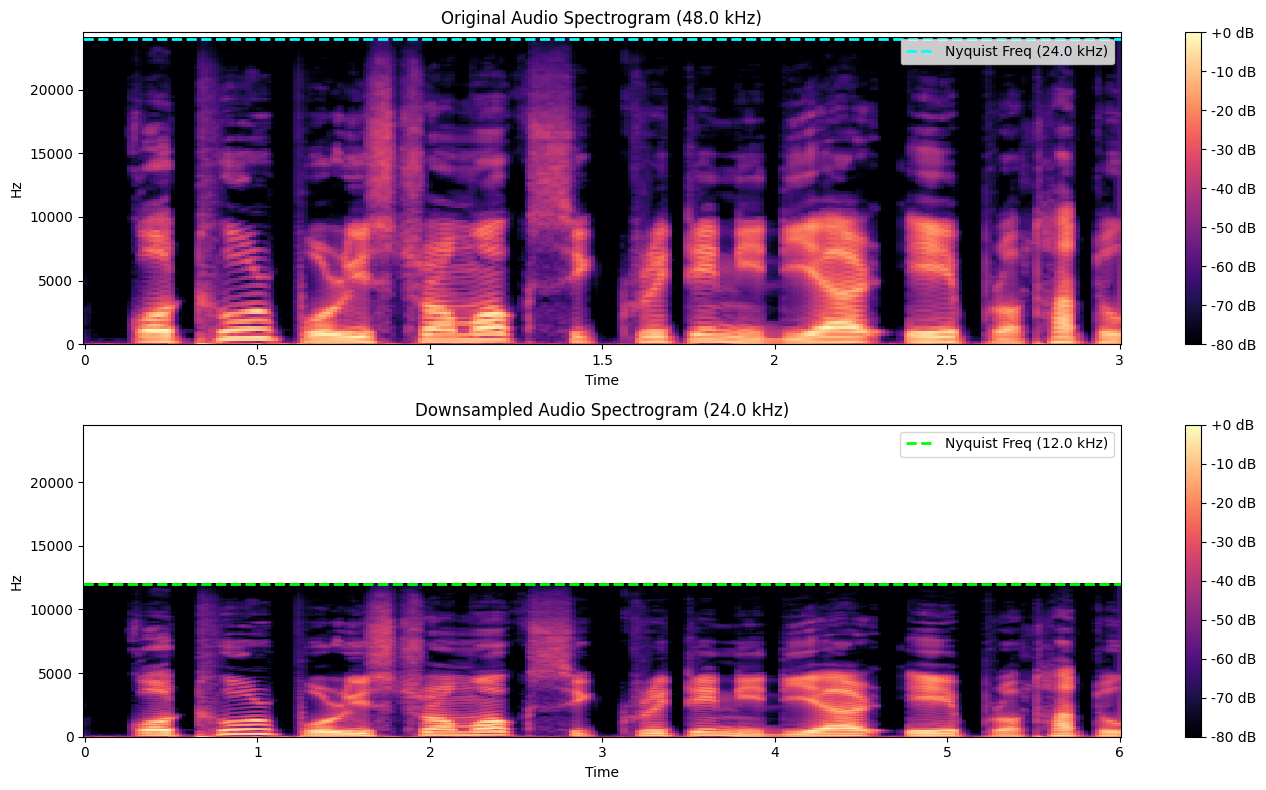

In [ ]:
# Load audio file using librosa
re_audio_path = "assets/audio.wav"  # Replace with your audio file
y_librosa_rasa, sr_rasa = librosa.load(re_audio_path, sr=None, mono=True)
y_librosa_rasa = y_librosa_rasa[: 3*sr_rasa]

# downsample audio
target_sr_rasa = 24000
y_downsampled_np = librosa.resample(y_librosa_rasa, orig_sr=sr_rasa, target_sr=target_sr_rasa)

n_fft = 2048 # Number of samples per FFT window

plt.figure(figsize=(14, 8))

# --- Plot 1: Original Audio Spectrogram ---
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot

# Compute Mel-spectrogram
S_orig = librosa.feature.melspectrogram(y=y_librosa_rasa.squeeze(), sr=sr_librosa, n_mels=128)
S_db_orig = librosa.power_to_db(S_orig, ref=np.max)
librosa.display.specshow(S_db_orig, sr=sr_rasa, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Original Audio Spectrogram ({sr_rasa / 1000} kHz)')
plt.ylim(0, sr_rasa / 2 + 500) # Set Y-axis limit just above Nyquist for clarity

# Mark the Nyquist frequency of the original audio
nyquist_orig = sr_rasa / 2
plt.axhline(y=nyquist_orig, color='cyan', linestyle='--', linewidth=2, label=f'Nyquist Freq ({nyquist_orig / 1000} kHz)')
plt.legend()
plt.tight_layout()

# --- Plot 2: Downsampled Audio Spectrogram ---
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
S_downsampled = librosa.feature.melspectrogram(y=y_librosa_rasa.squeeze(), sr=sr_librosa, n_mels=128)
S_db_downsampled = librosa.power_to_db(S_downsampled, ref=np.max)
librosa.display.specshow(S_db_downsampled, sr=target_sr_rasa, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Downsampled Audio Spectrogram ({target_sr_rasa / 1000} kHz)')
plt.ylim(0, sr_rasa / 2 + 500) # Keep Y-axis limit consistent with original for direct comparison

# Mark the Nyquist frequency of the downsampled audio
nyquist_downsampled = target_sr_rasa / 2
plt.axhline(y=nyquist_downsampled, color='lime', linestyle='--', linewidth=2, label=f'Nyquist Freq ({nyquist_downsampled / 1000} kHz)')
plt.legend()
plt.tight_layout()

plt.show()


### What the Plots Show

- The **top plot** shows an audio signal sampled at **48 kHz**.
  Even though the sampling rate is 48,000 samples per second, we only see frequency content up to **24 kHz**. This is because the Nyquist frequency for a 48 kHz sampling rate is:

$$
\frac{48{,}000}{2} = 24{,}000\ \text{Hz}
$$

- The **bottom plot** shows the same audio after being **downsampled to 24 kHz**.
  Now, the Nyquist frequency is reduced to **12 kHz**, so any frequency content above 12 kHz is no longer present in the visualization.

This illustrates how reducing the sampling rate also reduces the range of frequencies that can be represented. Frequencies higher than the Nyquist frequency will either be lost or may cause distortion (aliasing) if not properly filtered out before sampling.

In short, to avoid losing important details in a signal, always make sure your sampling rate is **at least twice** the highest frequency you want to preserve.

---

### What is MFCC and Why Is It Important?

**Mel-Frequency Cepstral Coefficients (MFCCs)** are one of the most popular and widely used feature representations in speech and audio processing tasks.

---

#### 🔹 What Are MFCCs?

MFCCs capture the **spectral envelope** (shape) of short audio frames in a way that models how humans perceive sound.

They are computed through several steps:

1. **Fourier Transform (FFT):** Breaks the audio into its frequency components.
2. **Mel Filterbank:** Applies a series of triangular filters on the frequency axis, spaced according to the Mel scale (which compresses higher frequencies because humans hear them less precisely).
3. **Log Energy:** Takes the logarithm of the filterbank outputs (similar to how human loudness perception works).
4. **Discrete Cosine Transform (DCT):** Decorrelates the log filterbank energies, resulting in compact coefficients.

Typically, the **first 12–13 coefficients** (excluding the 0th, which captures overall energy) represent the key shape of the spectral envelope.

---

#### 🔹 Why Is MFCC Important?

✅ **Human Perception Aligned:**
MFCCs compress and smooth the frequency information similar to how the human ear processes sounds.

✅ **Compact Representation:**
They reduce the high-dimensional frequency data into a small set of meaningful features.

✅ **Widely Used in Speech Systems:**
- Speech recognition (ASR)
- Speaker identification
- Speech synthesis (TTS)
- Audio classification tasks

Compared to raw spectrograms or log-Mel features, MFCCs provide a **summary** that is often easier for models (especially older or simpler models) to work with.

MFCC shape: (13, 891)


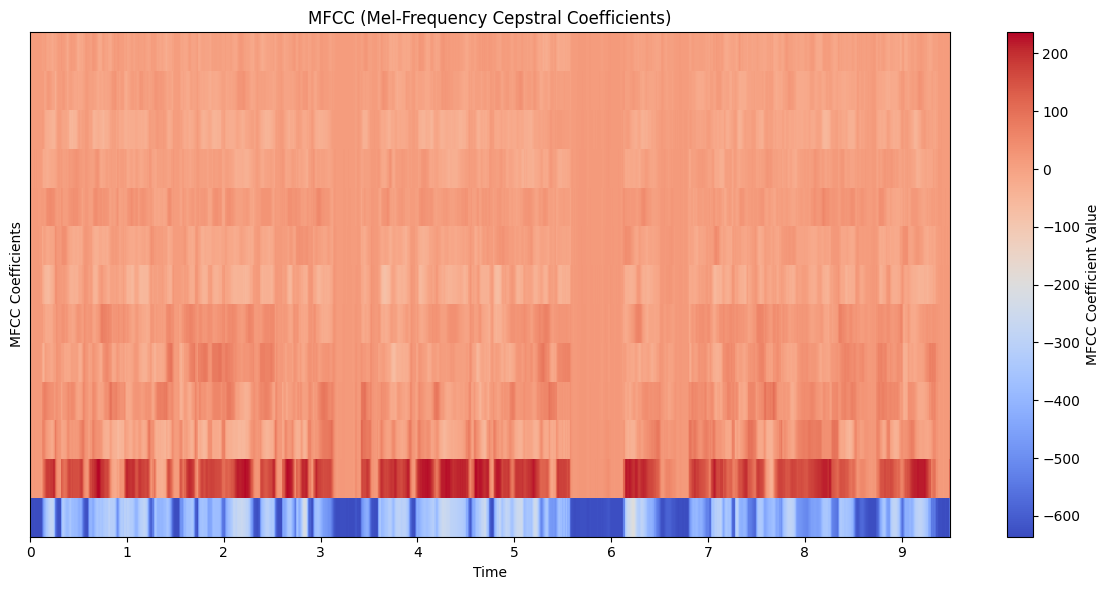

In [ ]:
# Load audio file
y_lib_rasa, sr_ = librosa.load(re_audio_path, sr=None, mono=True)

# Extract MFCCs (default: 13 coefficients)
mfccs = librosa.feature.mfcc(y=y_lib_rasa, sr=sr_rasa, n_mfcc=13)

print(f"MFCC shape: {mfccs.shape}")  # (n_mfcc, n_frames)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr_rasa, x_axis='time')
plt.colorbar(label='MFCC Coefficient Value')
plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

###🔍 Interpreting the MFCC Plot

✅ What you see:

* X-axis: Time (in seconds) → each column is a short-time frame (typically ~20–25 ms of audio).

* Y-axis: MFCC coefficient index (usually 1–13) → each row shows one MFCC coefficient across time.

* Color intensity: Value of the coefficient → red = higher values, blue = lower values.


---
🧠 How to read this:

>1️⃣ Lower coefficients (1–3, bottom rows)
These represent the overall spectral shape (similar to the envelope).
They capture broad frequency energy differences (like formant shapes in speech).

>2️⃣ Mid coefficients (4–10)
These capture details of the spectral shape, such as subtle resonances or shifts.

>3️⃣ Higher coefficients (11–13)
These mainly capture fine spectral variations or noise and are often less stable.

---
📊 Patterns you can spot:

1. Broad horizontal bands → stable spectral shapes over time (maybe steady vowels or tones).

2. Sudden vertical changes → quick spectral shifts (like consonants or onsets).

3. Repetitive patterns → repeated phonetic or prosodic patterns.

---
🚨 Important note:

The absolute values of MFCCs are not as meaningful as their relative patterns and dynamics.

In most tasks (like classification or synthesis), models use MFCC sequences or their deltas (temporal changes) rather than single-frame values.

---
### Fundamental Frequency (F0) and Pitch

The **fundamental frequency**, often written as **F0**, is the **lowest frequency component** of a periodic waveform. It represents the rate at which the entire waveform repeats.

In speech and audio signals, F0 plays a crucial role:

- For **voiced sounds** (like vowels or voiced consonants), F0 corresponds to the vibration rate of the **vocal folds**.
- For **musical tones**, F0 determines the **base tone** or **note** that we perceive.

---

### F0 and Pitch

Although **F0 is a physical quantity** (measured in **Hz**, or cycles per second), **pitch** is a **perceptual phenomenon** — it’s how we interpret the sound.

- Higher F0 → Higher pitch (we hear the sound as "higher")
- Lower F0 → Lower pitch (we hear the sound as "deeper")

> 🔎 **Example:**
> A typical adult male voice might have an F0 around **100–120 Hz**, while a female voice might range around **180–220 Hz**. Children typically have even higher F0 values.

---

### Important Notes

- Pitch perception depends mostly on F0, but not exclusively. Timbre, harmonics, and loudness can also affect how we perceive pitch.
- Unvoiced sounds (like "s" or "f") do not have a clearly defined F0 because the vocal folds are not vibrating.

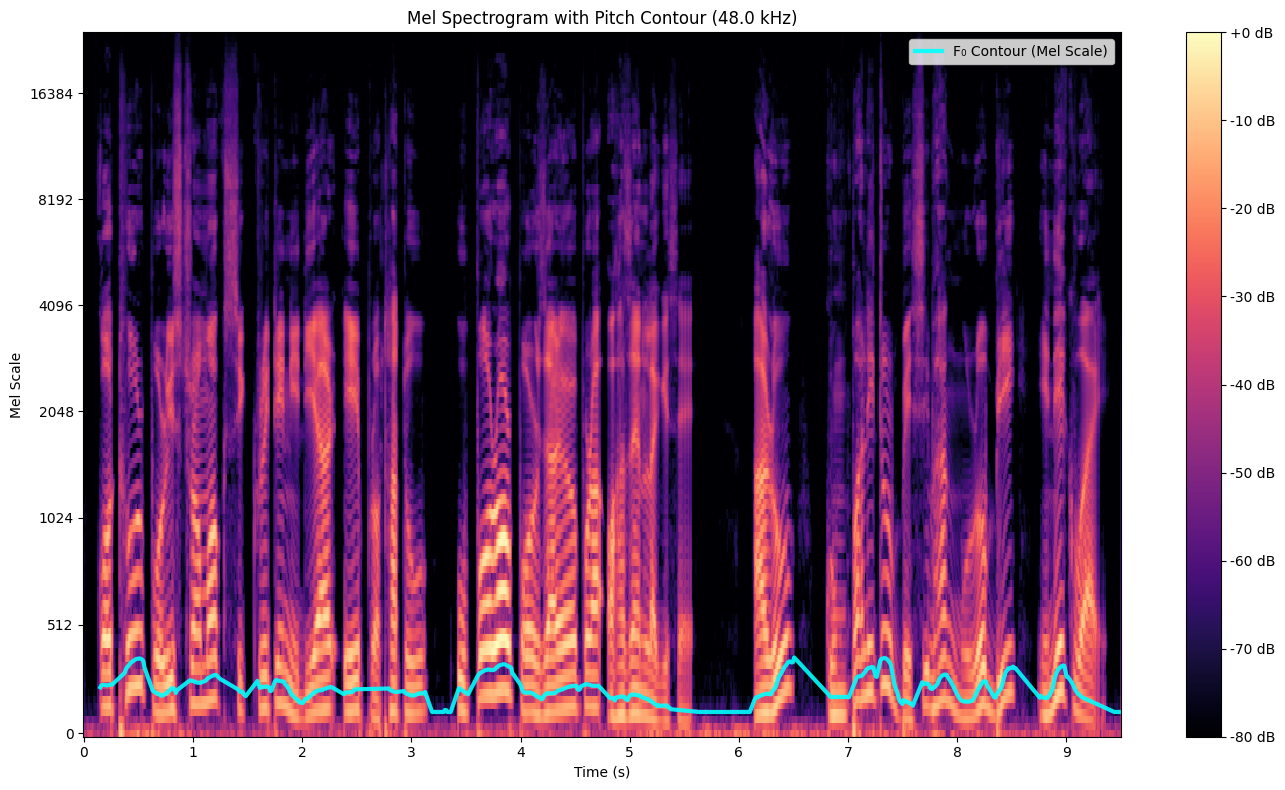

In [ ]:
# Compute mel spectrogram (not STFT as the comment incorrectly states)
D_orig_F0 = librosa.feature.melspectrogram(y=y_lib_rasa, sr=sr_, n_mels=128, n_fft=n_fft)
S_db_orig_F0 = librosa.power_to_db(D_orig_F0, ref=np.max)

# Extract F0 using librosa.pyin
F0, voiced_flag, voiced_probs = librosa.pyin(
    y_lib_rasa,
    fmin=librosa.note_to_hz('C2'),
    fmax=librosa.note_to_hz('C7'),
    sr=sr_
)

# Time axes
waveform_times = np.arange(len(y_lib_rasa)) / sr_
F0_times = librosa.times_like(F0, sr=sr_)
valid_F0_mask = ~np.isnan(F0)

# Create the plot
plt.figure(figsize=(14, 8))

# Display mel spectrogram (corrected variable name)
librosa.display.specshow(S_db_orig_F0, sr=sr_, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')

# Convert F0 to mel scale for proper overlay on mel spectrogram
def hz_to_mel(freq_hz):
    """Convert frequency in Hz to Mel scale"""
    return 2595 * np.log10(1 + freq_hz / 700)

# Convert F0 to mel scale
F0_mel = hz_to_mel(F0[valid_F0_mask])

# Overlay pitch contour in mel scale
plt.plot(F0_times[valid_F0_mask], F0_mel,
         color='cyan', linewidth=3, label='F₀ Contour (Mel Scale)', alpha=0.9)

plt.title(f'Mel Spectrogram with Pitch Contour ({sr_ / 1000:.1f} kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Mel Scale')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 🔊 Loudness and Energy

In speech processing, two important measures we often compute are:

✅ **Energy** — a measure of the signal’s strength or power over time. It is calculated as the sum of the squared amplitude values over a frame.

✅ **Loudness** — a perceptual measure related to how “loud” a sound feels to human listeners, but in simple calculations, we often approximate it using the signal’s **Root Mean Square (RMS)** value or **log-energy**.

### 🧮 Mathematical Definition of Energy and Loudness

We define the **short-time energy** of a signal frame $ x[n] $  as:

$$
E = \sum_{n=0}^{N-1} x[n]^2
$$

where:
- $ N $  is the number of samples in the frame,
- $ x[n] $  is the amplitude of the $ n $ -th sample.

The **Root Mean Square (RMS) loudness** is defined as:

$$
\text{RMS} = \sqrt{\frac{1}{N} \sum_{n=0}^{N-1} x[n]^2}
$$

This RMS value gives us a perceptual approximation of loudness, as it better reflects how humans perceive the strength of the sound compared to raw energy.

💡 **Note:** While energy and RMS are related, RMS normalizes the energy by the frame length, making it more comparable across frames of different sizes.


Let’s calculate and visualize both!

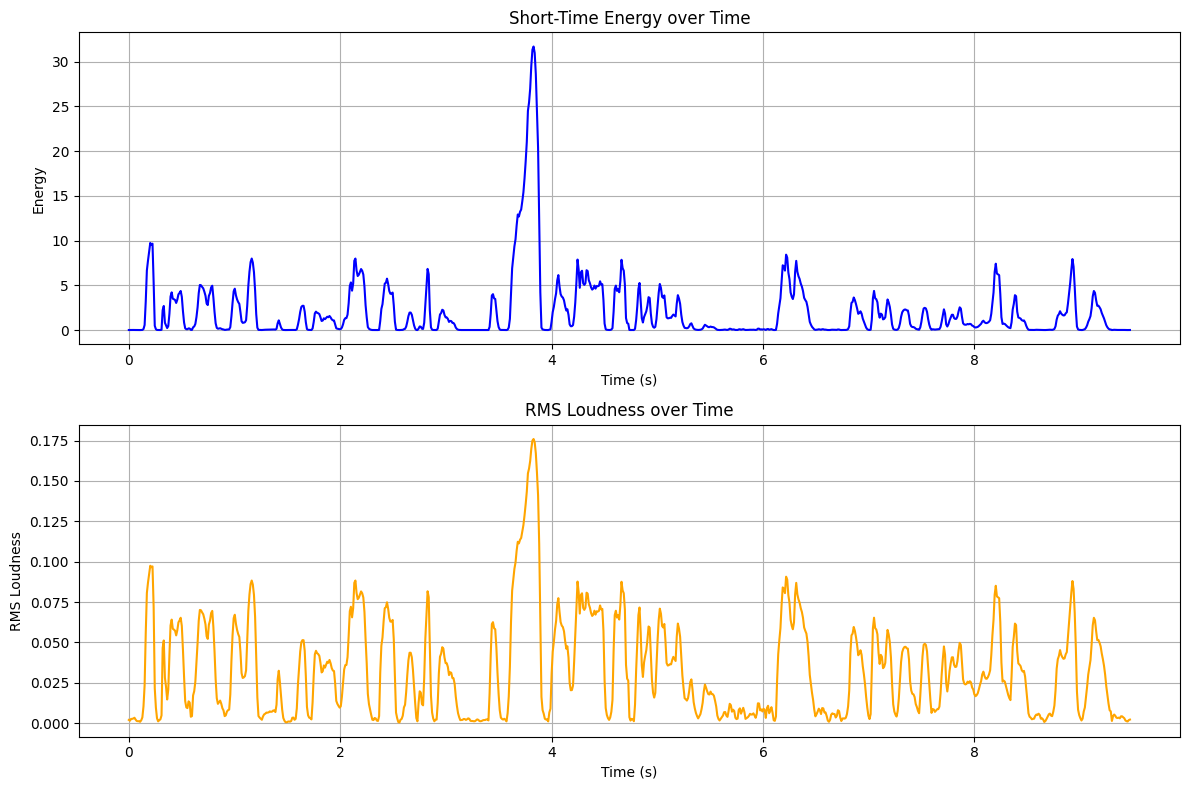

In [ ]:
# Frame size (number of samples per frame)
frame_size = 1024
hop_size = 512

# Calculate short-time energy
energy = np.array([
    np.sum(y_lib_rasa[i:i+frame_size]**2)
    for i in range(0, len(y_lib_rasa) - frame_size, hop_size)
])

# Calculate loudness (RMS)
rms = np.array([
    np.sqrt(np.mean(y_lib_rasa[i:i+frame_size]**2))
    for i in range(0, len(y_lib_rasa) - frame_size, hop_size)
])

# Create time axis
time = np.arange(len(energy)) * (hop_size / sr_rasa)  # sr_rasa = sampling rate

# Plot as two subplots
plt.figure(figsize=(12, 8))

# Plot Energy
plt.subplot(2, 1, 1)
plt.plot(time, energy, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.title('Short-Time Energy over Time')
plt.grid(True)

# Plot RMS Loudness
plt.subplot(2, 1, 2)
plt.plot(time, rms, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('RMS Loudness')
plt.title('RMS Loudness over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

---
### 🎧 Understanding SNR, SDR, and SI-SDR

In speech and audio processing, especially in **denoising**, **source separation**, and **speech enhancement**, we need ways to measure how well the system is performing. Three commonly used metrics are:

✅ **SNR (Signal-to-Noise Ratio)**
Measures how strong the target signal is compared to the background noise:

$$
\text{SNR} = 10 \log_{10} \frac{\| s \|^2}{\| s - \hat{s} \|^2}
$$

where:

- $ s $  = clean reference signal,
- $ \hat{s} $  = noisy or processed signal.

<br>

✅ **SDR (Signal-to-Distortion Ratio)**
A broader metric that measures total distortion, including noise, interference, and artifacts:

$$
\text{SDR} = 10 \log_{10} \frac{\| s \|^2}{\| s - \hat{s} \|^2}
$$

(similar formula, but used in separation tasks where distortions come from more than just noise).

<br>

✅ **SI-SDR (Scale-Invariant SDR)**
Improves on SDR by removing scale differences (loudness mismatches) between $ s $  and $ \hat{s} $ , which can otherwise unfairly penalize models. It projects $ \hat{s} $  onto $ s $  before computing the error:

$$
\text{SI-SDR} = 10 \log_{10} \frac{\| \alpha s \|^2}{\| \alpha s - \hat{s} \|^2}
$$

where $ \alpha = \frac{\langle \hat{s}, s \rangle}{\| s \|^2} $ .

💡 **Key idea:** SI-SDR is preferred in deep learning tasks today because it focuses on the quality of the recovered waveform, not on loudness scaling.

SNR: -6.44 dB
SDR: 11.03 dB
SI-SDR: 5.14 dB


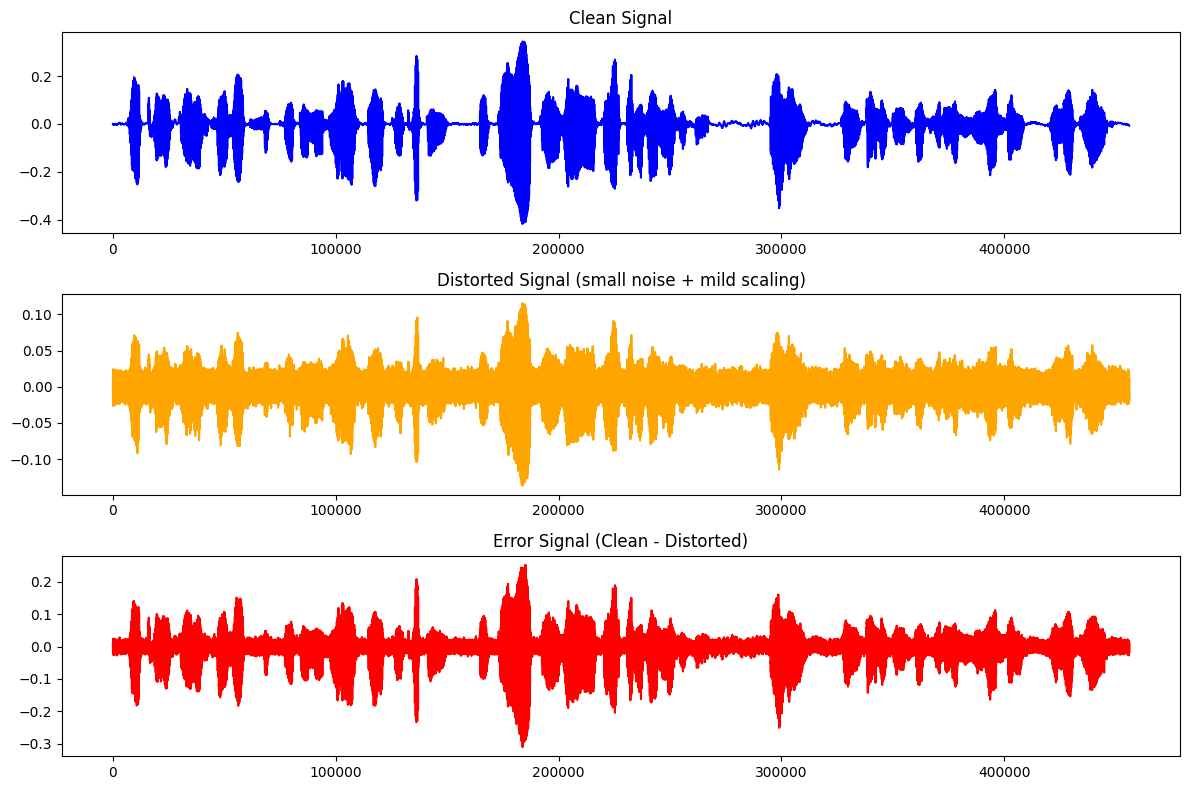

In [ ]:
from torchmetrics.audio import ScaleInvariantSignalDistortionRatio, SignalNoiseRatio, SignalDistortionRatio

snr = SignalNoiseRatio()
sdr = SignalDistortionRatio()
si_sdr = ScaleInvariantSignalDistortionRatio()

# Generate distorted version: add small white noise
noise = np.random.normal(0, 0.025, y_lib_rasa.shape)  # much smaller noise
distorted = y_lib_rasa + noise

# Apply mild scaling distortion (simulate slight volume change)
distorted *= 0.3  # only 5% quieter

# Compute SNR
snr = snr(torch.from_numpy(y_lib_rasa), torch.from_numpy(distorted))
print(f"SNR: {snr:.2f} dB")

sdr_value = sdr(torch.from_numpy(y_lib_rasa), torch.from_numpy(distorted))
print(f"SDR: {sdr_value:.2f} dB")

si_sdr_value = si_sdr(torch.from_numpy(y_lib_rasa), torch.from_numpy(distorted))
print(f"SI-SDR: {si_sdr_value:.2f} dB")

# Visualize signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(y_lib_rasa, color='blue')
plt.title('Clean Signal')

plt.subplot(3, 1, 2)
plt.plot(distorted, color='orange')
plt.title('Distorted Signal (small noise + mild scaling)')

plt.subplot(3, 1, 3)
plt.plot(y_lib_rasa - distorted, color='red')
plt.title('Error Signal (Clean - Distorted)')

plt.tight_layout()
plt.show()

---

## Exercise

Welcome to your first hands-on audio analysis project! You'll analyze a small speech dataset to apply everything you've learned about digital audio processing.

### 🎯 Objective

Analyze audio samples from different speakers/languages/emotions and discover patterns in their acoustic properties using the techniques you've learned.

### 📊 Dataset Setup

Download a few audio samples from the [Rasa](https://huggingface.co/datasets/ai4bharat/Rasa) or [Expresso](https://huggingface.co/datasets/ylacombe/expresso) datasets for your language---preferrably for different styles and emotions. Listen to the audio files, analyze them and share some insights about the audios. For ex:

* Audios laced with the anger emotion have a higher speaking-rate and is louder in comparison to neutral samples.
* Audios with the sad emotion sound generally mellower and streched compared to the other emotions.
* You may feel free to share other insights. **Note:** I have not introduced speaking-rate in the above notebook, but it should be simple enough to calculate as it is just a measure of character delivery per second or word delivery per second depending on how you want to measure it.

### 🔍 Analysis

Feel free to explore all the concepts that we have explored above and share some insightful comments on changes that you notice within a language, across languages, between speakers of the same language, between speakers of different languages etc.